In [3]:
import pandas as pd

#Initialization
datafile = 'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv'

#import the data
data = pd.read_csv(datafile, index_col = 0) #index_col = 0 changes the un-named column to the index
data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [5]:
#check the shape of the data
data.shape

(200, 4)

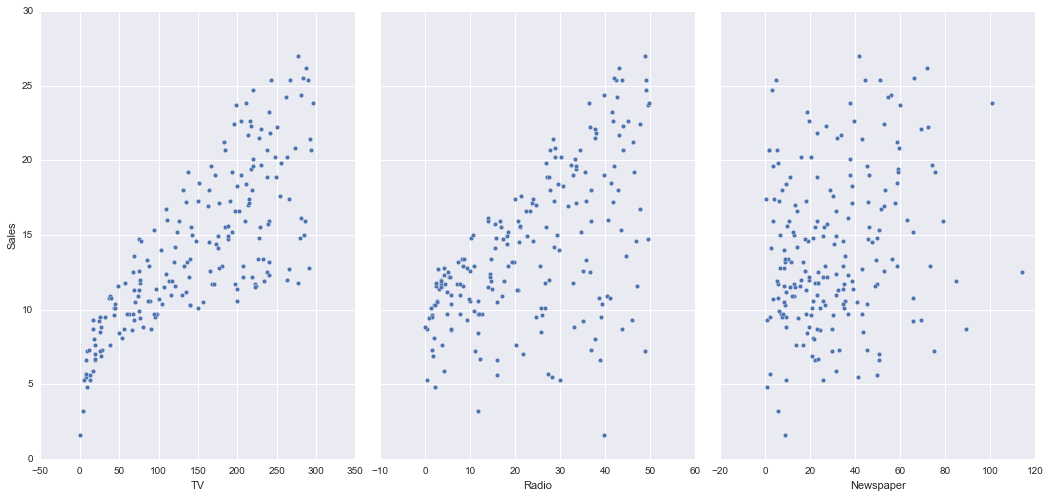

In [7]:
'''
Sales is a continous variable so we use regression
'''
import seaborn as sns
# allow plots to appear within the notebook
%matplotlib inline
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

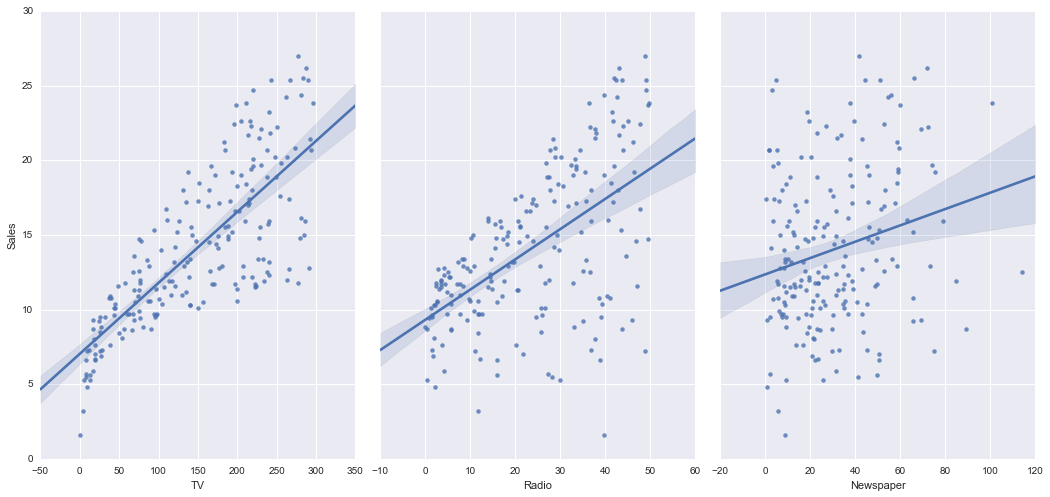

In [8]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [9]:
#create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# select a subset of the original DataFrame using the list created above 
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4

In [13]:
y=data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [15]:
'''
Split X and y into training and test sets using the default split of 75% -25%
'''
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1)

#print the shapes of the training and test variables
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [17]:
'''
Build a linear regression model using the data using the import,instatiate,fit procedure
'''
#import
from sklearn.linear_model import LinearRegression

#instatiate
linear_reg = LinearRegression()

#fit the model (learn the coefficients)
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
'''
Interpreting the coefficients
'''
print(linear_reg.intercept_)
print(linear_reg.coef_)


2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [20]:
# pair the feature names with the coefficients
list(zip(feature_cols, linear_reg.coef_))

[('TV', 0.046564567874150281),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

In [22]:
'''
How do we interpret the TV coefficient (0.0466)?
For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.
Important notes:
This is a statement of association, not causation.
If an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

MAKING PREDICTIONS
'''
# make predictions on the testing set
y_pred = linear_reg.predict(X_test)

In [25]:
#Evaluate the model using RMSE as the metric
import numpy as np
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.40465142303


In [27]:
#Given that the value of Sales ranged from 5-25, an error of 1.4 is not too bad (remember RMSE is in the same units as the y variable)

'''
Feature selectionÂ¶
Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?
Let's remove it from the model and check the RMSE!
'''

# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linear_reg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linear_reg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


In [ ]:
'''
The RMSE decreased when we removed Newspaper from the model. 
(Error is something we want to minimize, so a lower number for RMSE is better.) 
Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.
'''